In [ ]:
!pip install langchain openai

In [ ]:
import pandas as pd
import numpy as np
import openai
import time
import os

# NER on polymers

In [ ]:
openai.api_key = "API_KEY"

In [ ]:
!unzip /content/ecps_text.zip

Archive:  /content/ecps_text.zip
  inflating: ecps_text/acschemmater9b01293.txt  
  inflating: ecps_text/acsmacrolett6b00250.txt  
  inflating: ecps_text/acsmacromol0c02719.txt  
  inflating: ecps_text/acsmacromol5b02638.txt  
  inflating: ecps_text/acsmacromol6b01114.txt  
  inflating: ecps_text/acsmacromol6b01763.txt  
  inflating: ecps_text/acsmacromol8b01789.txt  
  inflating: ecps_text/adma200902917.txt  
  inflating: ecps_text/adma201002234.txt  
  inflating: ecps_text/adom201800594.txt  
  inflating: ecps_text/c0py00405g.txt  
  inflating: ecps_text/c4tc02685c.txt  
  inflating: ecps_text/c8py01105b.txt  
  inflating: ecps_text/c9py01720h.txt  
  inflating: ecps_text/cm202117d.txt  
  inflating: ecps_text/ma100366y.txt  
  inflating: ecps_text/ma501080u.txt  
  inflating: ecps_text/nmat2272.txt  


In [ ]:
def model_1(txt_file_path):
    """Model 1 will read the text of each paper and extract only the paragraph that refers to the polymerization reaction."""
    response_msgs = []
    file_contents= []
    file_names = []
    answers = ''  # Collect answers from chatGPT
    # Loop through each file in the folder
    for filename in os.listdir(txt_file_path):
        # Check if the file is a text file
        if filename.endswith('.txt'):
            # Construct the full file path
            file_path = os.path.join(txt_file_path, filename)
            # Open the file for reading
            with open(file_path, 'r') as file:
                # Read the file content and add it to the list
                file_contents = file.read()


                print("Start to analyze paper: ", {filename})
                user_heading = f"This is a research paper related to polymers synthesis: {file_contents}."
                user_ending = """Your task is read the whole text and identify all the paragraphs that describe the synthetic methods. Your output should be strictly only these
                paragraphs without modifying their context and without adding any other wording."""

                attempts = 5
                while attempts > 0:
                    try:
                        response = client.chat.completions.create(
                            model='gpt-4-turbo-preview',
                            temperature = 0,
                            messages=[{
                                "role": "system",
                                "content": """Answer the question as truthfully as possible using the provided context."""
                            },
                                {"role": "user", "content": user_heading + user_ending}]
                        )
                        answer_str = response.choices[0].message.content
                        print('gpt-answer', answer_str)
                        if not answer_str.lower().startswith("n/a"):
                            answers += '\n' + answer_str
                        break
                    except Exception as e:
                        attempts -= 1
                        if attempts <= 0:
                            print(f"Error: Failed to process paper {filename}. Skipping. (model 1)")
                            break
                        print(f"Error: {str(e)}. Retrying in 60 seconds. {attempts} attempts remaining. (model 1)")
                        time.sleep(60)

        response_msgs.append(answers)
        file_names.append(filename)
    df = pd.concat([pd.DataFrame(file_names, columns=['file_name']), pd.DataFrame(response_msgs, columns=['synthesis paragraphs'])], axis=1)
    return df #response_msgs

In [ ]:
txt_file_path = '/datasets/ecps_text'

model_1_df= model_1(txt_file_path)

In [ ]:
model_1_df.to_csv('ecps_synthesis_paragraphs_1.csv', index = None)

In [ ]:
# Splitting the text based on '\n\n'
paragraphs = model_1_df.split('\n\n')

# Display the list of paragraphs
for i, paragraph in enumerate(paragraphs, start=1):
    print(f"Paragraph {i}:\n{paragraph}\n")

In [ ]:
ecps_synthesis = pd.DataFrame(paragraphs, columns=['synthesis paragraphs']).to_csv('ecps_synthesis_paragraphs_new.csv', index = None)
ecps_synthesis.to_csv('ch_reaction_synthesis_paragraphs.csv', index = None)

In [ ]:
ecps_synthesis = pd.read_csv('experimental_paragraphs_retrieval.csv', encoding='latin1')
ecps_synthesis

,paper,synthesis paragraphs
0,acsmacromol0c02719.txt,Palladium-catalyzed direct heteroarylation pol...
1,c4tc02685c.txt,All polymers were prepared using optimized DAP...
2,acsmacrolett6b00250.txt,The first example of a solution processable di...
3,adma200902917.txt,"In recent work, we investigated the effect of ..."
4,acschemmater9b01293,The approach to the polymer syntheses is shown...
5,acsmacromol8b01789.txt,The synthetic approach to the monomer and poly...
6,adom201800594.txt,ECP-black was synthesized with Stille coupling...
7,c9py01720h.txt,The monomers were synthesized through a transe...
8,acsmacromol6b01763.txt,--- PAcDOT2-Ph(OMe)2 To a 50 mL round-bottom f...
9,c8py01105b.txt,The synthesis of monomers is shown in the ESI....


In [ ]:
def model_2(df):
    """Model 2 will read the synthesis paragraph and extract all the chemical elements."""
    response_msgs = []
    file_contents= []
    answers = ''  # Collect answers from chatGPT
    # Loop through each file in the folder
    for paragraph in df["synthesis paragraphs"]:
      print("Start to analyze paper: ")
      user_heading = f"This is a paragraph related to polymers synthesis.\n\nContext:\n{paragraph}"
      user_ending = """Your task is to identify all the chemical elements used in the polymerization reaction only. Then generate an HTML version of the input text,
      marking up specific entities related to chemical elements. The specific elements that need to be identified are the following: base, solvents, ligands, and catalysts.
      Use HTML <span> tags to highlight these entities. Each <span> should have a class attribute indicating the type of the entity.
      """
      attempts = 3
      while attempts > 0:
          try:
              response = client.chat.completions.create(
                  model='gpt-4-turbo-preview',
                  temperature = 0,
                  messages=[{
                      "role": "system",
                      "content": """You are a highly intelligent and accurate polymers domain expert.
                       Answer the question as truthfully as possible using the provided context. If you cannot identify the entities return "N/A". """
                  },
                      {"role": "user", "content": user_heading + user_ending}]
              )
              answer_str = response.choices[0].message.content
              # if not answer_str.lower().startswith("n/a"):
              #     answers += '\n' + answer_str
              break
          except Exception as e:
              attempts -= 1
              if attempts <= 0:
                  print(f"Error: Failed to process paper. Skipping. (model 1)")
                  break
              print(f"Error: {str(e)}. Retrying in 60 seconds. {attempts} attempts remaining. (model 1)")
              time.sleep(60)
      print(answer_str)

      response_msgs.append(answer_str)

    return response_msgs

In [ ]:
df_elements = model_2(ecps_synthesis)#ecps_synthesis)

Start to analyze paper: 
```html
This is a paragraph related to polymers synthesis.

Context:
Palladium-catalyzed direct heteroarylation polymerization (DHAP) conditions previously used to synthesize electron-rich ECPs were followed for the synthesis of each DAT-co-ProDOT copolymer. (72??74) Polymerizations were performed in <span class="solvent">N,N-dimethylacetamide</span> at 140 ôC using <span class="catalyst">palladium(II) acetate (Pd(OAc)2)</span> as the catalyst, <span class="base">potassium carbonate (K2CO3)</span> as the base, and <span class="ligand">pivalic acid (PivOH)</span> as the proton shuttle. It is worth noting that attempts using 3,4-bis(octyl)thiophene as the dihydro comonomer yielded an oligomeric material with number-average molecular weights (Mn) ?ª4.0??7.0 kg/mol as measured via size-exclusion chromatography (SEC) versus polystyrene (PS) standards. Historically, dioxythiophene-based copolymers with Mn values below 10.0 kg/mol neither exhibit sufficient film f

In [ ]:
pd.DataFrame(df_elements, columns=["ner_html"]).to_csv('ecps_synthesis_paragraphs_all_papers_html_papers.csv', index = None)

In [ ]:
df_elements

['```html\nThis is a paragraph related to polymers synthesis.\n\nContext:\nPalladium-catalyzed direct heteroarylation polymerization (DHAP) conditions previously used to synthesize electron-rich ECPs were followed for the synthesis of each DAT-co-ProDOT copolymer. (72\x9f??74) Polymerizations were performed in <span class="solvent">N,N-dimethylacetamide</span> at 140 ô\x9bC using <span class="catalyst">palladium(II) acetate (Pd(OAc)2)</span> as the catalyst, <span class="base">potassium carbonate (K2CO3)</span> as the base, and <span class="ligand">pivalic acid (PivOH)</span> as the proton shuttle. It is worth noting that attempts using 3,4-bis(octyl)thiophene as the dihydro comonomer yielded an oligomeric material with number-average molecular weights (Mn) \x9f?ª4.0\x9f??7.0 kg/mol as measured via size-exclusion chromatography (SEC) versus polystyrene (PS) standards. Historically, dioxythiophene-based copolymers with Mn values below 10.0 kg/mol neither exhibit sufficient film forming 

In [ ]:
import pandas as pd
df2= pd.read_csv("/content/ecps_synthesis_paragraphs_all_papers_html_papers.csv")
df2=df2.dropna(axis=0)
df_elements = df2.ner_html.values
df_elements

array(['```html\nThis is a paragraph related to polymers synthesis.\n\nContext:\nPalladium-catalyzed direct heteroarylation polymerization (DHAP) conditions previously used to synthesize electron-rich ECPs were followed for the synthesis of each DAT-co-ProDOT copolymer. (72\x9f??74) Polymerizations were performed in <span class="solvent">N,N-dimethylacetamide</span> at 140 ô\x9bC using <span class="catalyst">palladium(II) acetate (Pd(OAc)2)</span> as the catalyst, <span class="base">potassium carbonate (K2CO3)</span> as the base, and <span class="ligand">pivalic acid (PivOH)</span> as the proton shuttle. It is worth noting that attempts using 3,4-bis(octyl)thiophene as the dihydro comonomer yielded an oligomeric material with number-average molecular weights (Mn) \x9f?ª4.0\x9f??7.0 kg/mol as measured via size-exclusion chromatography (SEC) versus polystyrene (PS) standards. Historically, dioxythiophene-based copolymers with Mn values below 10.0 kg/mol neither exhibit sufficient film fo

In [ ]:
from IPython.display import HTML

from IPython.display import HTML

# Your provided text with the <span> tag
text_html = df_elements[0]# df_elements[1]

# Define a style for the 'catalysts' class to highlight it
# style_html = '''
# <style>
# .catalysts { background-color: yellow; }
# .solvents { background-color: lightblue; }
# .ligands { background-color: lightgreen; }
# .base { background-color: lightcoral; }
# </style>
# '''

style_html = '''
<style>
.catalysts { border: 3px solid yellow; color: #000; background-color:yellow; padding: 2px; }
.solvents { border: 3px solid lightblue; color: #000; background-color: lightblue; padding: 2px; }
.ligands { border: 3px solid lightgreen; color: #000; background-color: lightgreen; padding: 2px; }
.base { border: 3px solid lightcoral; color: #000; background-color:lightcoral; padding: 2px; }
.chemical-element { border: 3px solid lightcoral; color: #000; background-color:lightcoral; padding: 2px; }
</style>
'''

# Combine the style and the text
full_html = style_html + text_html

# Display the highlighted text with style in Colab
HTML(full_html)



In [ ]:
# Assuming BeautifulSoup is installed
from bs4 import BeautifulSoup

def get_elements(html_text):

  # Parse the HTML
  soup = BeautifulSoup(html_text, 'html.parser')

  # Classes of interest
  classes = ["solvents", "ligands", "catalysts", "base"]

  # Initialize an empty list to store highlighted words
  highlighted_words = []

  # Extract words for each class and add to the list
  #for class_name in classes:
  for span in soup.find_all('span'):#, class_=class_name):
          highlighted_words.append(span.text)

  # Display the list of highlighted words
  return highlighted_words


In [ ]:
elements = []

for i in range(len(df_elements)):
  elements.append(get_elements(df_elements[i]))

In [ ]:
combined_list = []
for sublist in elements:
    combined_list.extend(sublist)

In [ ]:
def model_3(elements_list):
    """Model 3 will evaluate the elements statistics."""
    response_msgs = []
    file_contents= []
    answers = ''  # Collect answers from chatGPT
    # Loop through each file in the folder

    user_heading = f"This is a list with all the chemical elemenents used in a polymerization reaction.\n\nContext:\n{elements_list}"
    user_ending = """Your task is to count all the instances and return a dictionary with the main general categories (base, solvents, ligands, catalysts) as keys,
    elements that belong to each category as subkeys and the number of instances as values on the subkeys. Some elements that are similar should be considered as the same
    element, e.g., THF and dry THF are the same elemement and should belong to the same category. Another example FeCl3 and iron (III) cloride is the same element and should belong to the same category.
    Also  Pd(OAc)2 and palladium (II) acetate.
    Also remove from the list any toxic solvent such as cloroform, hexane.

    """
    # user_ending = """
    # You are provided with a text corpus containing chemical information. Your task is to analyze this corpus and identify the frequency of different chemical entities belonging to specific categories.

    # Categories:
    # Base: This category includes all basic chemical compounds, such as hydroxides, alkoxides, and amines.
    # Solvent: This category encompasses all liquid substances used to dissolve other chemicals. Common examples include water, ethanol, and acetone.
    # Ligand: This category includes molecules or ions that bind to central atoms in coordination complexes. Examples include phospine.
    # Catalyst: This category includes substances that accelerate chemical reactions without being consumed in the process. Examples include enzymes, metals, and metal oxides.

    # Normalization:
    # Consider similar entities as equivalent. For instance, "THF" and "dry THF" both refer to tetrahydrofuran and should be counted together under the "Solvent" category.
    # Recognize synonyms for chemical compounds. "Iron (III) chloride" is the full name for "FeCl3" and both represent same element. 1,1'-Bis(diphenylphosphino)ferrocene is the name for DPPF.

    # Output:
    # Generate a dictionary containing the main categories (base, solvent, ligand, catalyst) as keys.
    # Within each category key, use elements as subkeys.
    # Assign the count (number of occurrences) of each element as the value associated with its corresponding subkey in the dictionary.

    # * remove from the list any toxic solvent such as cloroform, hexane

    # Example:
    # Input: "The experiment used sodium hydroxide (NaOH) as a base and ethanol (EtOH) as a solvent. Iron (III) chloride (FeCl3) was employed as a catalyst."

    # Output: {'Base': {'NaOH': 1}, 'Solvent': {'EtOH': 1}, 'Ligand': {}, 'Catalyst': {'FeCl3': 1}}
    # """
    attempts = 3
    while attempts > 0:
        try:
            response = client.chat.completions.create(
                model='gpt-4-turbo-preview',
                temperature = 0,
                 response_format={ "type": "json_object" },
                messages=[{
                    "role": "system",
                    "content": """You are a highly intelligent and accurate polymers domain expert.
                      Answer the question as truthfully as possible using the provided context and save the results in a json file. """
                },
                    {"role": "user", "content": user_heading + user_ending}]
            )
            answer_str = response.choices[0].message.content
            # if not answer_str.lower().startswith("n/a"):
            #     answers += '\n' + answer_str
            break
        except Exception as e:
            attempts -= 1
            if attempts <= 0:
                print(f"Error: Failed to process paper. Skipping. (model 1)")
                break
            print(f"Error: {str(e)}. Retrying in 60 seconds. {attempts} attempts remaining. (model 1)")
            time.sleep(60)
    print(answer_str)

    response_msgs.append(answer_str)

    return response_msgs

In [ ]:
from openai import OpenAI
client = OpenAI(api_key= 'API_KEY')


In [ ]:
dictionary = model_3(combined_list)

{
  "solvents": {
    "N,N-dimethylacetamide": 4,
    "methanol": 16,
    "acetone": 5,
    "THF": 15,
    "toluene": 7,
    "propylene carbonate": 3,
    "ethanol": 1,
    "isopropanol": 1,
    "DMF": 5,
    "DMSO": 4,
    "dioxane": 2,
    "ethyl acetate": 12,
    "1-hexanol": 1,
    "CH3CN": 1
  },
  "bases": {
    "potassium carbonate": 6,
    "K3PO4": 7,
    "cesium fluoride": 1,
    "KF": 4,
    "NaH": 2,
    "KOH": 1,
    "NaOtBu": 2
  },
  "ligands": {
    "PCy3": 1,
    "1,10-bis(diphenylphosphino)ferrocene (DPPF)": 1,
    "tris(dibenzylideneacetone)dipalladium(0)": 4,
    "tri-t-butylphosphonium tetrafluoroborate": 2,
    "1,1'-bis(diphenylphosphino)ferrocene": 2,
    "P(t-Bu)3 3 HBF4": 1,
    "P(o-tol)3": 1,
    "BINAP": 1
  },
  "catalysts": {
    "palladium(II) acetate": 6,
    "FeCl3": 3,
    "palladium": 4,
    "Pd2(dba)3": 2,
    "Pd[P(tBu)3]2": 1,
    "CuI": 1,
    "AgF": 2
  }
}


In [ ]:
# dictionary with the main monomers counts found from the literature database

dictionary1 = {

  "Base": {
    "KOH": 1,
    "K2CO3": 4,
    "K3PO4": 7,
    "KF": 4,
    "NaH": 2,
    "NEt3": 1,
    "NaOtBu": 2
  },
  "Solvent": {
    "N,N-dimethylacetamide": 6,
    "methanol": 16,
    "acetone": 5,
    "THF": 15,
    "toluene": 7,
    "propylene carbonate": 3,
    "ethanol": 1,
    "isopropanol": 1,
    "DMF": 5,
    "DMSO": 4,
    "dioxane": 2,
    "ethyl acetate": 12,
    "1-hexanol": 1,
    "CH3CN": 1
  },
  "Ligand": {
   "PCy3": 1,
    "DPPF": 3,
    "tri-t-butylphosphonium tetrafluoroborate": 3,
    "P(o-tol)3": 1,
    "BINAP": 1
  },

  "Catalyst": {
    "FeCl3": 3,
    "palladium": 4,
    "Pd2(dba)3": 5,
    "Pd[P(tBu)3]2": 1,
    "CuI": 1,
    "AgF": 1,
    "Silver Fluoride": 2,
    "Palladium(II) acetate": 7
  },
    "Monomers":{
      "*c1sc(*)c2OCC(COCC(CC)CCCC)(COCC(CC)CCCC)COc12":74 ,
      "*c1ccc(*)c2nsnc12":34 ,
      "*c1sc(*)c(OC)c1OC":23 ,
      "*c1sc(*)c(CCCCCCCC)c1CCCCCCCC":18 ,
      "*c1sc(*)c2OCCOc12":12 ,
      "*c3sc(c2sc(*)c1OCCOc12)c4OCCOc34":8 ,
      "*c1ccc3c(c1)Cc2cc(*)ccc23":6 ,
      "C1=CC(=CC=C1*)*":5
  }
}

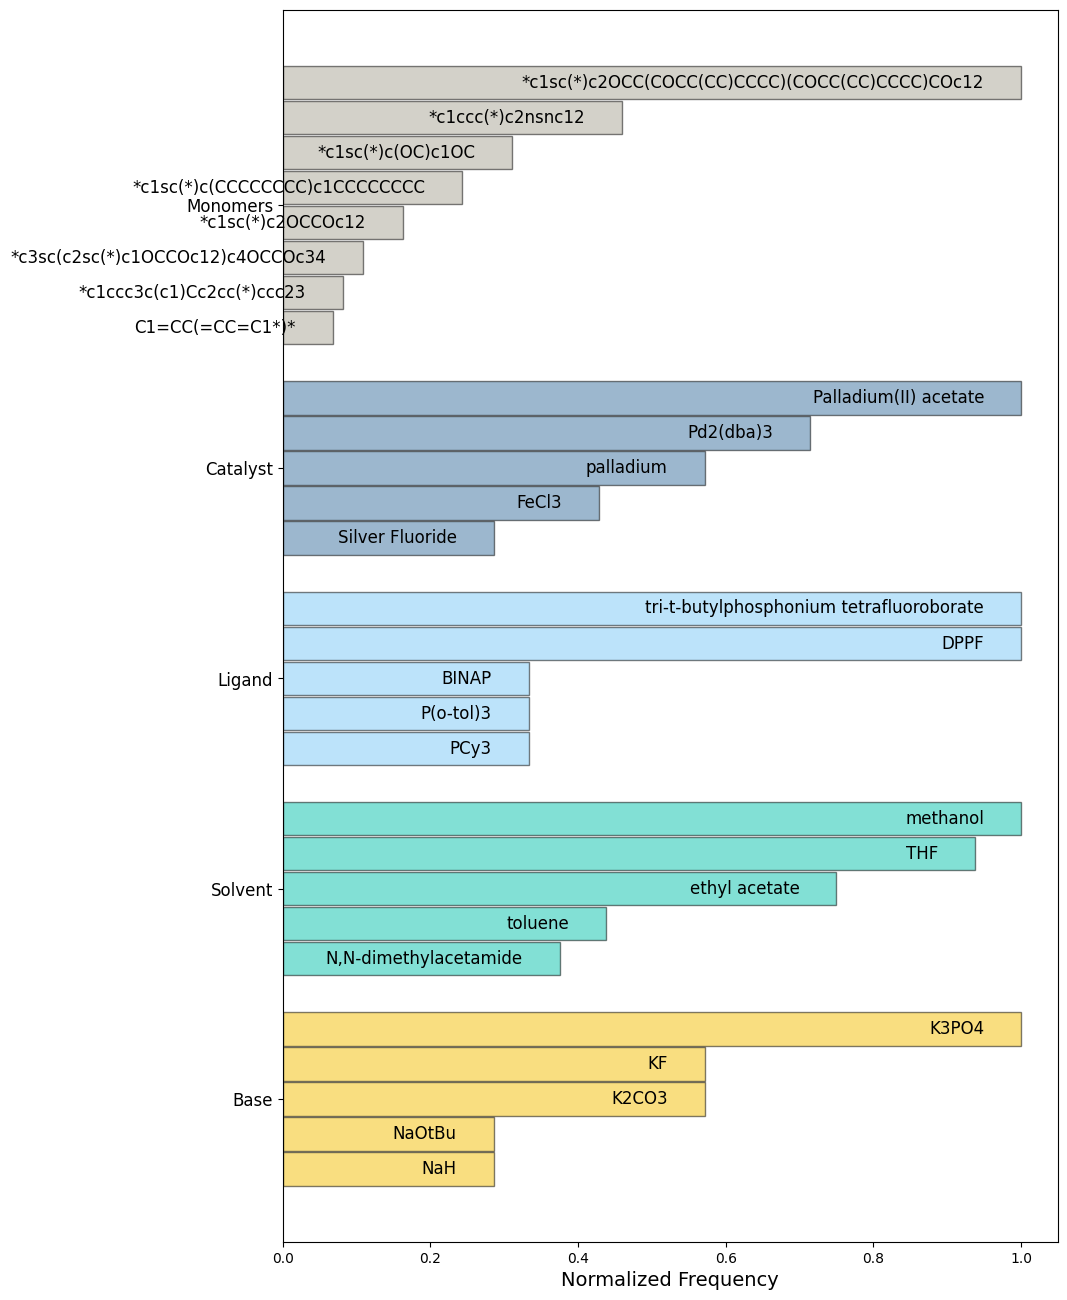

In [ ]:
def create_horizontal_bar_chart_with_annotations(dictionary):
    plt.figure(figsize=(10, 16))

    category_names = list(dictionary.keys())
    category_positions = []  # To track the y-position of each category for labeling
    current_position = 0  # Current y position for plotting bars

    for category, elements_dict in dictionary.items():
        # Check if the category is "Monomers" to decide the number of elements to display
        if category == "Monomers":
            sorted_elements = dict(sorted(elements_dict.items(), key=lambda item: item[1], reverse=False))
        else:
            sorted_elements = dict(sorted(elements_dict.items(), key=lambda item: item[1], reverse=False)[-5:])

        max_value = max(sorted_elements.values())  # Find the maximum value for normalization
        names = list(sorted_elements.keys())
        values = [value / max_value for value in sorted_elements.values()]

        # Plot bars for this category
        y_positions = np.arange(current_position, current_position + len(names))
        plt.barh(y_positions * 4, values, height=3.8, color=category_colors[category], label=category.capitalize(), edgecolor='black', alpha=0.5)
                # Annotate each bar with its element name
        for y, name in zip(y_positions*4, names):
            plt.text(values[names.index(name)] - 0.05, y, name, ha='right', va='center', fontsize=12)

        # Update for next category
        category_positions.append(np.mean(y_positions * 4))
        current_position += len(names) + 1  # Adding 1 for gap between categories

    # Labeling categories
    plt.yticks(category_positions, category_names, fontsize=12)

    # Adding labels and title
    plt.xlabel('Normalized Frequency', fontsize=14)
    plt.savefig('literature_receipt_figure_horizontal_customized.svg')
    plt.show()

# Call the function to create the plot with the customized data
create_horizontal_bar_chart_with_annotations(dictionary1)